# Clustering for mental health:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys
import warnings
warnings.filterwarnings('ignore')

c:\Anaconda\lib\site-packages\numba\core\decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
c:\Anaconda\lib\site-packages\visions\backends\shared\nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:
C:\Users\Eya Kaabachi\AppData\Local\Temp\ipykernel_15760\851023996.py:11: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `imp

In [2]:
df=pd.read_csv("new_datapfe.csv")
pd.set_option('display.max_columns', None)
df 

,Patient_ID,SEX,MARITAL,EDUCA,WEIGHT2,HEIGHT3,_INCOMG,_BMI5,_AGEG5YR,GENHLTH,EXERANY2,EXRACT11,EXEROFT1,EXERHMM1,EXRACT21,EXEROFT2,EXERHMM2,ALCDAY5,AVEDRNK2,MAXDRNKS,DROCDY3_,_RFBING5,_DRNKWEK,_RFDRHV5,DRNKANY5,MENTHLTH,FRUIT1,FVBEANS,FVGREEN,FVORANG,VEGETAB1,FRUTDA1_,BEANDAY_,GRENDAY_,ORNGDAY_,VEGEDA1_,_FRUTSUM,_VEGESUM,_FRTLT1,_VEGLT1,BPHIGH4,BPMEDS,BLOODCHO,CHOLCHK,ADDEPEV2,TOLDHI2,CVDINFR4,CVDCRHD4,CVDSTRK3,_MICHD,CHCSCNCR,DIABETE3,SMOKE100,SMOKDAY2,USENOW3,_SMOKER3,_RFSMOK3,PHYSHLTH
0,1,2,1,4,280.0,510.0,2,4018.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,18,310.0,320.0,310.0,305.0,101.0,33.0,67.0,33.0,17.0,100.0,50.0,217.0,2,1,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,15.0
1,2,2,2,6,165.0,508.0,1,2509.0,7,3.0,1.0,64.000000,212.0,100.0,69.0,212.0,100.0,0.0,1.0,2.0,0,1,0,1,2,0,305.0,302.0,202.0,202.0,304.0,17.0,7.0,29.0,29.0,13.0,24.0,78.0,2,2,3.0,1.0,1,4.0,2,2.0,2,2.0,2,2.0,2.0,3.0,1.0,1.0,3.0,1,2,0.0
2,3,2,2,4,158.0,511.0,5,2204.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,900,1,99900,1,1,0,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,1.0,7,2.0,1,2.0,2.0,3.0,2.0,3.0,3.0,4,1,15.0
3,4,2,1,4,180.0,507.0,5,2819.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,30,101.0,555.0,301.0,301.0,201.0,100.0,0.0,3.0,3.0,14.0,100.0,20.0,1,2,1.0,1.0,1,1.0,1,1.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,30.0
4,5,2,1,5,142.0,504.0,5,2437.0,9,5.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,102.0,203.0,204.0,310.0,320.0,200.0,43.0,57.0,33.0,67.0,100.0,200.0,1,1,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441451,441452,2,3,2,104.0,503.0,2,1842.0,11,4.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,555.0,205.0,555.0,201.0,201.0,0.0,71.0,0.0,14.0,14.0,29.0,200.0,2,2,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,1.0,2.0,3.0,3.0,4,1,0.0
441452,441453,2,1,5,160.0,503.0,1,2834.0,2,1.0,1.0,64.000000,105.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,202.0,303.0,201.0,202.0,100.0,29.0,10.0,14.0,29.0,117.0,82.0,1,2,3.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0
441453,441454,2,1,4,247.0,505.0,3,4110.0,11,4.0,1.0,52.432544,103.0,30.0,0.0,102.0,30.0,202.0,2.0,2.0,7,1,93,1,1,20,101.0,555.0,101.0,555.0,101.0,100.0,0.0,100.0,0.0,100.0,100.0,200.0,1,1,1.0,1.0,1,1.0,2,1.0,2,2.0,2,2.0,2.0,3.0,1.0,3.0,3.0,3,1,0.0
441454,441455,1,5,5,166.0,511.0,1,2315.0,7,3.0,2.0,52.432544,103.0,30.0,0.0,102.0,30.0,0.0,1.0,2.0,0,1,0,1,2,0,101.0,101.0,202.0,301.0,301.0,100.0,100.0,29.0,3.0,3.0,200.0,135.0,1,1,1.0,1.0,1,1.0,2,2.0,2,2.0,2,2.0,2.0,3.0,2.0,3.0,3.0,4,1,0.0


Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering')

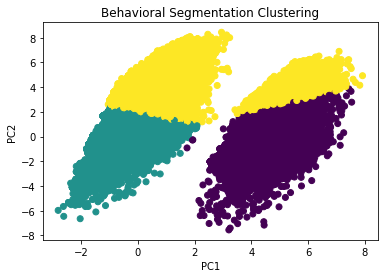

In [12]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline


features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
            'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
            'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'ADDEPEV2',
            '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std() 

# Define the PCA and clustering pipeline
pca_kmeans_pipeline = Pipeline([
    ('pca', PCA(n_components=2)),
    ('kmeans', MiniBatchKMeans(n_clusters=3, init='k-means++', random_state=42))
])

# Fit the pipeline to the standardized data
kmeans_model = pca_kmeans_pipeline.fit_predict(df_std)
# Visualize the clusters
plt.scatter(pca_kmeans_pipeline.named_steps['pca'].transform(df_std)[:, 0],
            pca_kmeans_pipeline.named_steps['pca'].transform(df_std)[:, 1],
            c=kmeans_model, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#kmeans_silhouette = silhouette_score(daf, kmeans_model)
kmeans_calinski = calinski_harabasz_score(daf, kmeans_model)
kmeans_davies = davies_bouldin_score(daf, kmeans_model)

#print("KMeans - Silhouette Coefficient: ", kmeans_silhouette)
print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  21508.62988258449
KMeans - Davies-Bouldin Index:  3.5792976800787124


In [17]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import BallTree
import numpy as np

features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
            'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
            'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
            '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

#sample_size = 50000
#df_sample = daf.sample(n=sample_size, random_state=42)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daf)

# Split data into training and testing sets using cross-validation sampling
X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [18]:
# Compute nearest neighbors using ball tree
tree = BallTree(X_pca)
min_samples = 10
dist, _ = tree.query(X_pca, min_samples)


In [19]:
# Find a suitable epsilon value
knn_distances = np.sort(dist, axis=0)[:, -1]
eps = np.mean(knn_distances)

In [20]:
# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model = dbscan.fit_predict(X_pca)

In [21]:
# Evaluate the clustering results
n_clusters = len(set(dbscan_model)) - (1 if -1 in dbscan_model else 0)
n_noise = list(dbscan_model).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

Estimated number of clusters: 4795
Estimated number of noise points: 119508


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#dbscan_silhouette = silhouette_score(daf, dbscan.labels_)
dbscan_calinski = calinski_harabasz_score(daf, dbscan.labels_)
dbscan_davies = davies_bouldin_score(daf, dbscan.labels_)

#print("dbscan - Silhouette Coefficient: ", dbscan_silhouette)
print("dbscan - Calinski-Harabasz Index: ", dbscan_calinski)
print("dbscan - Davies-Bouldin Index: ", dbscan_davies)

dbscan - Calinski-Harabasz Index:  43.97374790730895
dbscan - Davies-Bouldin Index:  10.466959892147619


In [4]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import pairwise_distances


features = ['_INCOMG', 'GENHLTH', 'EXERANY2', '_RFBING5', '_RFDRHV5', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', '_MICHD',
       'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3', '_SMOKER3', 'MENTHLTH',
       '_RFSMOK3', 'PHYSHLTH']
daf = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daf)

# Split data into training and testing sets using cross-validation sampling
X_train, X_test = train_test_split(X_scaled, test_size=0.1, random_state=42)

# Use PCA to reduce the dimensionality of the data to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Compute a distance matrix
dist = pairwise_distances(X_scaled)

# Find a suitable epsilon value
min_samples = 10
knn_distances = np.sort(dist, axis=0)[:, min_samples]
knn_distances = knn_distances[knn_distances != 0]
eps = np.mean(knn_distances)

# Cluster the data using DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_model = dbscan.fit_predict(X_scaled)

# Evaluate the clustering results
n_clusters = len(set(dbscan_model)) - (1 if -1 in dbscan_model else 0)
n_noise = list(dbscan_model).count(-1)

print('Estimated number of clusters: %d' % n_clusters)
print('Estimated number of noise points: %d' % n_noise)

MemoryError: Unable to allocate 1.42 TiB for an array with shape (441456, 441456) and data type float64

The first experiment was to work with dbscan algorithm but it was very consumming when it comes to computation so i had to optimise using Ball Tree to search for the nearest neighbors and i got a large number of clusters which is 4795, so i decided to work with a random sample. However we still got a large number of clusters which is not logical (246 clusters)

In [1]:
# Visualize the clustering
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.get_cmap('viridis', n_clusters)

for i in range(n_clusters):
    if i == -1:
        # Black used for noise.
        color = 'k'
    else:
        color = colors(i)
    # Plot the points in each cluster
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], s=10, c=color, alpha=0.5, label='Cluster {}'.format(i))

plt.title('DBSCAN Clustering of LLCP2015 Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

NameError: name 'dbscan' is not defined

There are many feature selection techniques available, each with their own strengths and weaknesses. Here is an example of using the mutual information feature selection technique to select the most important features for clustering

In [4]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

# Separate target variable from features
X = df.drop('ADDEPEV2', axis=1)
y = df['ADDEPEV2']

In [5]:
# Select top k features using mutual information score
k = 20
selector = SelectKBest(mutual_info_classif, k=k)
selector.fit(X, y)

SelectKBest(k=20,
            score_func=<function mutual_info_classif at 0x000002292752E1F0>)

In [6]:
# Get selected feature indices and names
selected_features = X.columns[selector.get_support()]
print('Selected features:', selected_features)

Selected features: Index(['SEX', 'EXERANY2', '_RFDRHV5', 'MENTHLTH', '_FRTLT1', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3',
       '_SMOKER3', '_RFSMOK3'],
      dtype='object')


KMeans(n_clusters=1, random_state=42)

KMeans(n_clusters=2, random_state=42)

KMeans(n_clusters=3, random_state=42)

KMeans(n_clusters=4, random_state=42)

KMeans(n_clusters=5, random_state=42)

KMeans(n_clusters=6, random_state=42)

KMeans(n_clusters=7, random_state=42)

KMeans(random_state=42)

KMeans(n_clusters=9, random_state=42)

KMeans(n_clusters=10, random_state=42)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10, random_state=42),
                 k=(1, 11))

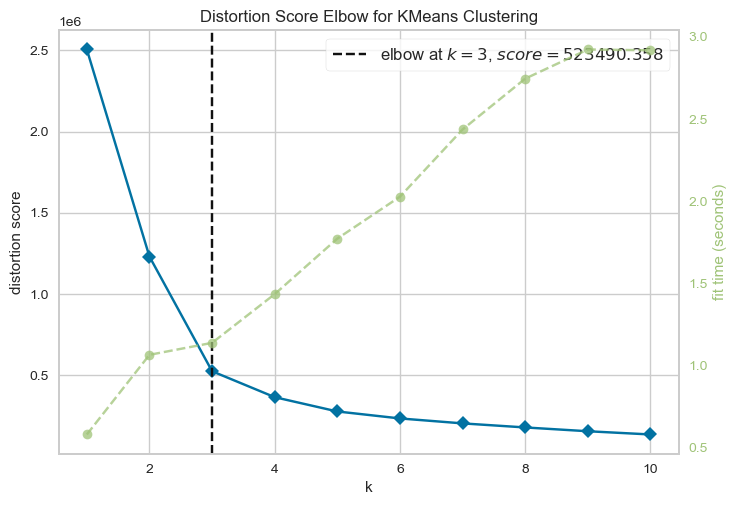

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [7]:
#features = ['_BMI5','SEX','_AGEG5YR','MARITAL','EXEROFT1','MAXDRNKS','SMOKDAY2','PHYSHLTH','VEGETAB1','FRUIT1','MENTHLTH','GENHLTH','EDUCA','_INCOMG']
features = ['SEX', 'EXERANY2', '_RFDRHV5', 'MENTHLTH', '_FRTLT1', '_VEGLT1',
       'BPMEDS', 'BLOODCHO', 'TOLDHI2', 'CVDINFR4', 'CVDCRHD4', 'CVDSTRK3',
       '_MICHD', 'CHCSCNCR', 'DIABETE3', 'SMOKE100', 'SMOKDAY2', 'USENOW3','ADDEPEV2',
       '_SMOKER3', '_RFSMOK3']
#features = ['SEX','MARITAL','EDUCA','_INCOMG','_BMI5','_AGEG5YR','GENHLTH','EXERANY2','MENTHLTH','EXRACT21','ALCDAY5','_RFBING5','FRUIT1','FVGREEN','FVORANG','_FRTLT1','SMOKE100','SMOKDAY2','_SMOKER3','_RFSMOK3','PHYSHLTH']
daf = df[features]

# Standardize the data
df_std = (daf - daf.mean()) / daf.std()

# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pd.DataFrame(pca.fit_transform(df_std), columns=['PC1', 'PC2'])

# Determine the optimal number of clusters using elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)
from yellowbrick.cluster import KElbowVisualizer
visualizer = KElbowVisualizer(kmeans, k=(1, 11))

# Fit the data to the visualizer
visualizer.fit(df_pca)

# Visualize the elbow curve
visualizer.show()

Text(0.5, 0, 'PC1')

Text(0, 0.5, 'PC2')

Text(0.5, 1.0, 'Behavioral Segmentation Clustering On Mental Health')

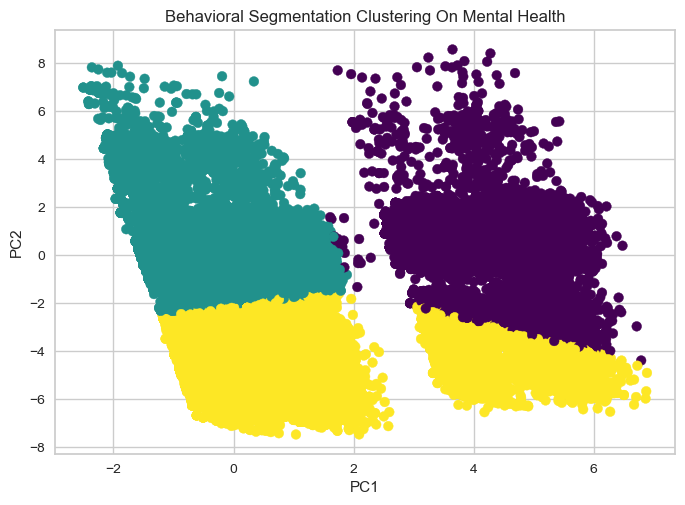

In [8]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
model = kmeans.fit_predict(df_pca)

# Visualize the clusters
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=model, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Behavioral Segmentation Clustering On Mental Health')
plt.show()

In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score


kmeans_calinski = calinski_harabasz_score(daf, model)
kmeans_davies = davies_bouldin_score(daf, model)

print("KMeans - Calinski-Harabasz Index: ", kmeans_calinski)
print("KMeans - Davies-Bouldin Index: ", kmeans_davies)

KMeans - Calinski-Harabasz Index:  5615.910061436014
KMeans - Davies-Bouldin Index:  5.410368361373069


In [13]:
# Create a new dataframe with the original features and the cluster labels
clustered_data = pd.concat([daf.reset_index(drop=True), pd.DataFrame({'cluster': kmeans.labels_})], axis=1)

# Calculate the size of each cluster
cluster_sizes = clustered_data['cluster'].value_counts().sort_index()

# Print the size of each cluster
print('Cluster Sizes:')
for i in range(len(cluster_sizes)):
    print(f'Cluster {i}: {cluster_sizes[i]}')

# Calculate the mean values of each feature for each cluster
cluster_means = clustered_data.groupby('cluster').mean()

# Print the mean values of each feature for each cluster
print('\nCluster Means:')
print(cluster_means)

for i in range(kmeans.n_clusters):
    cluster = clustered_data.loc[clustered_data['cluster'] == i]
    profile = ProfileReport(cluster, title=f"Cluster {i} Profile Report", explorative=True)
    profile.to_file(f"Mental_clustering_{i}_profile.html")

Cluster Sizes:
Cluster 0: 58169
Cluster 1: 348480
Cluster 2: 34807

Cluster Means:
              SEX  EXERANY2  _RFDRHV5  MENTHLTH   _FRTLT1   _VEGLT1    BPMEDS  \
cluster                                                                         
0        1.533704  1.340319  1.108339  7.131359  1.477127  1.248775  1.099744   
1        1.595024  1.216216  1.042588  3.491233  1.315766  1.168741  1.061059   
2        1.463097  1.353406  1.026489  5.942799  1.348665  1.215589  1.050363   

         BLOODCHO   TOLDHI2  CVDINFR4  CVDCRHD4  CVDSTRK3    _MICHD  CHCSCNCR  \
cluster                                                                         
0        1.369819  1.684677  1.989548  1.992677  1.975657  1.952810  1.946088   
1        1.234803  1.662075  2.021869  1.999076  1.983924  1.996754  1.907561   
2        1.057776  1.314276  1.359468  1.294912  1.841382  1.001436  1.815353   

         DIABETE3  SMOKE100  SMOKDAY2   USENOW3  ADDEPEV2  _SMOKER3  _RFSMOK3  
cluster                  

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[3 1 3 ... 3 3 2]


Text(0.5, 0, 'PC1')

Text(0.5, 0.5, 'PC2')

Text(0.5, 0, 'PC3')

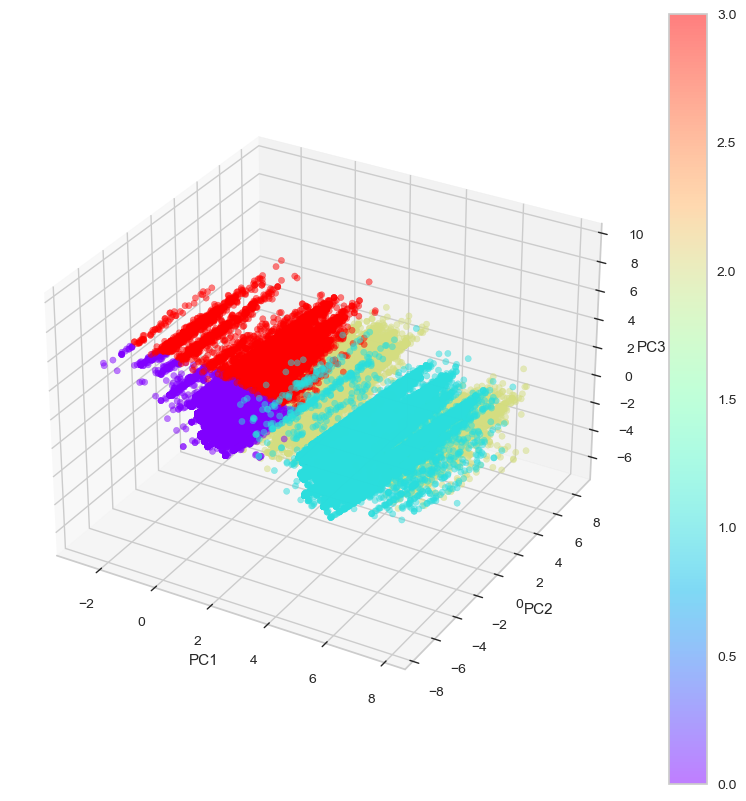

In [6]:
cluster_labels = kmeans.labels_
print(cluster_labels)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plotting the clusters
scatter = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=cluster_labels, cmap='rainbow', alpha=0.5)

# Setting labels for the plot
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Adding a colorbar
plt.colorbar(scatter)

# Displaying the plot
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cluster_labels = kmeans.labels_
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(daf.drop('MENTHLTH', axis=1), cluster_labels, test_size=0.2, random_state=42)

# Train a classifier on the training set
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Evaluate accuracy of predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc}")

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9762492638064604


In [16]:
# Identify the cluster with the highest proportion of patients with mental issues
cluster_mental_issues = pd.DataFrame(daf.groupby(kmeans.labels_)['MENTHLTH'].mean())
cluster_mental_issues = cluster_mental_issues.sort_values(by='MENTHLTH', ascending=False).head(1)
mental_issues_cluster_label = cluster_mental_issues.index[0]
#'_BMI5': [2204.0], 'SEX': [1.0], 'MARITAL': [1.0], '_AGEG5YR': [2.0], 'EXEROFT1': [103.0], 'MAXDRNKS' :[2.0],'SMOKDAY2' :[1.0],'PHYSHLTH' :[15.0],'VEGETAB1' :[201.0],'FRUIT1' :[101.0],'GENHLTH' :[3.0],'EDUCA' :[5],'_INCOMG' :[2], 'MENTHLTH': [0]
# Make a prediction for a new patient
new_patient = pd.DataFrame({'_INCOMG' :[5], 'GENHLTH':[3.0], 'EXERANY2':[2.0], '_RFBING5':[1], '_RFDRHV5':[1], '_VEGLT1':[2],
       'BPMEDS':[2.0], 'BLOODCHO':[1], 'CVDINFR4':[7], 'CVDCRHD4':[1.0], 'CVDSTRK3':[2], '_MICHD':[1.0],
       'CHCSCNCR':[1.0], 'DIABETE3':[2.0], 'SMOKE100':[2.0], 'SMOKDAY2':[3.0], 'USENOW3':[3.0], '_SMOKER3':[2], 'MENTHLTH':[20],
       '_RFSMOK3':[2], 'PHYSHLTH':[15.0]
       })
new_data_pca = pca.transform(new_patient)
# Predict the cluster label for the new patient
new_patient_cluster = kmeans.predict(new_data_pca)

# Check if the new patient is more likely to develop mental issues based on the identified cluster
if new_patient_cluster == mental_issues_cluster_label:
    print("This patient is more likely to develop mental issues.")
else:
    print("This patient is not more likely to develop mental issues.")

This patient is more likely to develop mental issues.


### Mental Health Risk Prediction:

In [14]:
# Split data into features (X) and target variable (y)
X = daf.drop('ADDEPEV2', axis=1)
y = daf['ADDEPEV2']

# Add the cluster labels as a new column to the DataFrame
#cluster_labels = kmeans.labels_
#daf['cluster'] = cluster_labels


In [15]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from catboost import CatBoostClassifier
# Define the hyperparameters for the CatBoost algorithm
params = {'learning_rate': 0.1, 'depth': 6,\
          'l2_leaf_reg': 3, 'iterations': 100}
  
# Initialize the CatBoostClassifier object 
# with the defined hyperparameters and fit it on the training set
model_catb = CatBoostClassifier(**params)
model_catb.fit(X_train, y_train)

0:	learn: 0.6273864	total: 175ms	remaining: 17.4s
1:	learn: 0.5744795	total: 198ms	remaining: 9.73s
2:	learn: 0.5326180	total: 221ms	remaining: 7.16s
3:	learn: 0.5014496	total: 246ms	remaining: 5.91s
4:	learn: 0.4785093	total: 269ms	remaining: 5.12s
5:	learn: 0.4601652	total: 292ms	remaining: 4.57s
6:	learn: 0.4457371	total: 311ms	remaining: 4.13s
7:	learn: 0.4338422	total: 335ms	remaining: 3.85s
8:	learn: 0.4246988	total: 358ms	remaining: 3.62s
9:	learn: 0.4175181	total: 380ms	remaining: 3.42s
10:	learn: 0.4118642	total: 402ms	remaining: 3.25s
11:	learn: 0.4073977	total: 431ms	remaining: 3.16s
12:	learn: 0.4038063	total: 455ms	remaining: 3.04s
13:	learn: 0.4005905	total: 478ms	remaining: 2.94s
14:	learn: 0.3986115	total: 501ms	remaining: 2.84s
15:	learn: 0.3965950	total: 522ms	remaining: 2.74s
16:	learn: 0.3949427	total: 549ms	remaining: 2.68s
17:	learn: 0.3936614	total: 570ms	remaining: 2.6s
18:	learn: 0.3925474	total: 593ms	remaining: 2.53s
19:	learn: 0.3917471	total: 620ms	remainin

In [18]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
# Predict the target variable on the validation
# set and evaluate the performance
catboost_md = model_catb.predict(X_test)
# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy = model_catb.score(X_test, y_test)
precision = precision_score(y_test, catboost_md,average = 'macro')
recall = recall_score(y_test, catboost_md,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
# Classification Report of logreg_cv
print(classification_report(catboost_md, y_test))

Accuracy: 0.8369501200561772
Precision: 0.7467650046462078
Recall: 0.6487723699554877
              precision    recall  f1-score   support

           1       0.34      0.63      0.45      9165
           2       0.95      0.86      0.90     79127

    accuracy                           0.84     88292
   macro avg       0.65      0.75      0.68     88292
weighted avg       0.89      0.84      0.86     88292



In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

# Train a random forest classifier on the training data
model_ranfor = RandomForestClassifier()
model_ranfor.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred_ranfor = model_ranfor.predict(X_test)

# Evaluate the performance of the model (e.g., accuracy, precision, recall)
accuracy_ranfor = model_ranfor.score(X_test, y_test)
precision = precision_score(y_test, y_pred_ranfor,average = 'macro')
recall = recall_score(y_test, y_pred_ranfor,average = 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy_ranfor)
print("Precision:", precision)
print("Recall:", recall)
print(classification_report(y_pred_ranfor, y_test))

RandomForestClassifier()

Accuracy: 0.8269378879173651
Precision: 0.7191541989199277
Recall: 0.6361610543227185
              precision    recall  f1-score   support

           1       0.33      0.58      0.42      9483
           2       0.94      0.86      0.90     78809

    accuracy                           0.83     88292
   macro avg       0.64      0.72      0.66     88292
weighted avg       0.88      0.83      0.85     88292



In [20]:
from sklearn.model_selection import RandomizedSearchCV
def get_best_parameters_RandomSearchCV(model, params, X_train, y_train):
    random_search = RandomizedSearchCV(model, param_distributions=params, cv=5, n_iter=10)
    random_search.fit(X_train, y_train)

    best_params = random_search.best_params_
    print(f'Best Parameters in {model}: {best_params}')
    print()

    best_estimator = random_search.best_estimator_
    return best_estimator

In [21]:
params_random_forest = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [22]:
random_forest_gscv = get_best_parameters_RandomSearchCV(model_ranfor, params_random_forest, X_train, y_train)
random_forest_gscv.n_jobs = -1
random_forest_gscv = random_forest_gscv.fit(X_train, y_train)

Best Parameters in RandomForestClassifier(): {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': None, 'bootstrap': False}



In [23]:
# Accuracy test score for logreg_cv
random_forest_gscv_acc = random_forest_gscv.score(X_test, y_test)
print(f'Random Forest Model with RandomSearchCV Accuracy: {random_forest_gscv_acc:.4}')
print()
# Make prediction on test dataset
y_pred_random_forest_gscv = random_forest_gscv.predict(X_test)

# Classification Report of logreg_cv
print(classification_report(y_pred_random_forest_gscv, y_test))

Random Forest Model with RandomSearchCV Accuracy: 0.8353

              precision    recall  f1-score   support

           1       0.33      0.63      0.43      8826
           2       0.95      0.86      0.90     79466

    accuracy                           0.84     88292
   macro avg       0.64      0.74      0.67     88292
weighted avg       0.89      0.84      0.86     88292



In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.model_selection import learning_curve

In [25]:
def plot_confusion_matrix(y_test, y_predict, color, title):
    """
    Confusion matrix to evaluate the accuracy of Models
    """
    cm = confusion_matrix(y_test, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color)
    plt.title(title)
    plt.xlabel('Predicted', fontsize=15)
    plt.ylabel('Actual', fontsize=15)
    plt.tight_layout()
    plt.show()

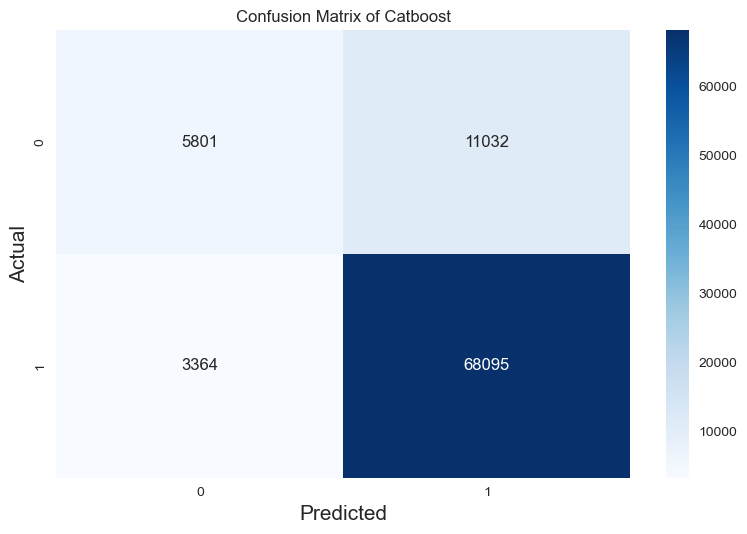

In [26]:
# Catboost model
title = 'Confusion Matrix of Catboost'
plot_confusion_matrix(y_test, catboost_md, 'Blues', title);


In [27]:
def plot_learning_curve(model, title, X, y, ylim=None, cv=5, n_jobs=4, 
                        train_sizes=np.linspace(0.1, 1.0, 10)):
    """
    Draw the training and GridSearchCV testing learning curves
    """
    plt.figure(figsize=(10, 7))
    plt.title(title, fontsize=20)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Number of training samples', fontsize=15)
    plt.ylabel('Score', fontsize=15)
    plt.tick_params(labelsize=14)
    
    # Get training and test scores along with train_sizes
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, 
                                                            cv=cv, n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    
    # Calculate mean and standard deviation of training and test data
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid(color='gray',linestyle='-')
    
    # Plot the learning curves
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1, color='r')
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1, color='g')
   
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
             label='Training score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g',
             label='Cross-validation score')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return plt

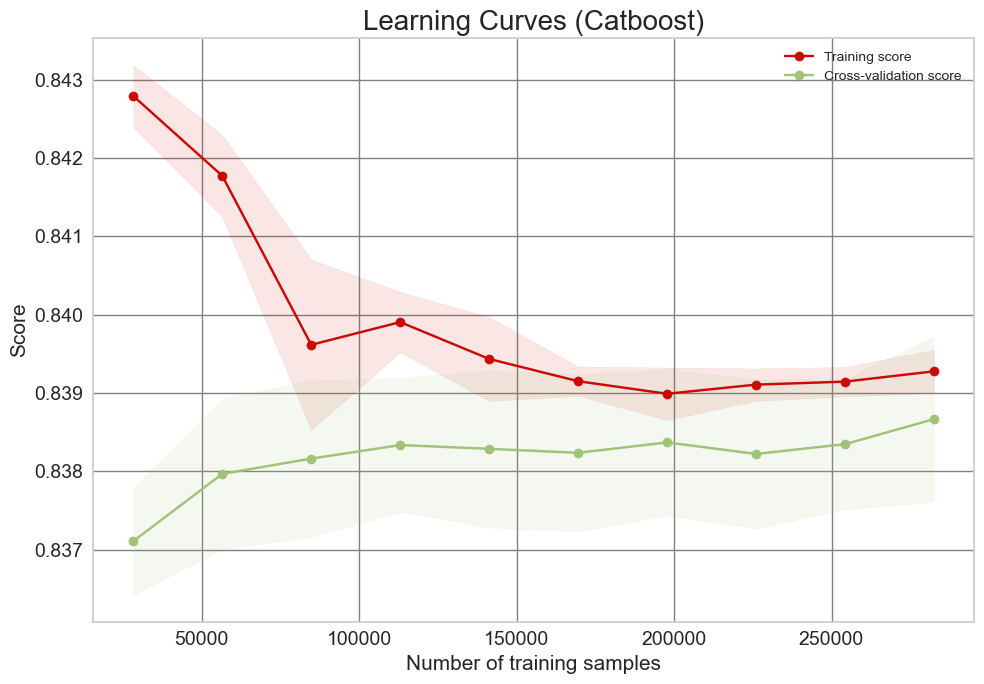

In [28]:
# Learning curve for Catboost Models
title = 'Learning Curves (Catboost)'
plot_learning_curve(model_catb, title, X_train, y_train, ylim=None, 
                    cv=5, n_jobs=10, train_sizes=np.linspace(0.1, 1.0, 10));

In [57]:
# Randomly choose new individuals from the dataset
num_new_individuals = 3  # Specify the desired number of new individuals
new_individuals = daf.sample(n=num_new_individuals, replace=True)

# Generate random numbers for each column based on the dataset column values
for column in new_individuals.columns:
    if column != 'cluster':  # Skip the 'cluster' column
        unique_values = daf[column].unique()
        new_individuals[column] = np.random.choice(unique_values, size=num_new_individuals)
new_individuals.drop(['ADDEPEV2'],axis=1,inplace=True)
# Print the generated new individuals
print(new_individuals)

# Predict the health outcomes for new individuals
predicted_outcomes = model_catb.predict(new_individuals)
predicted_outcomes= predicted_outcomes.flatten().tolist()
print(predicted_outcomes)

        SEX  EXERANY2  _RFDRHV5  MENTHLTH  _FRTLT1  _VEGLT1  BPMEDS  BLOODCHO  \
238123    1       1.0         2         2        1        2     1.0         7   
132465    1       1.0         2         0        2        2     1.0         7   
354846    1       1.0         1        22        1        2     1.0         1   

        TOLDHI2  CVDINFR4  CVDCRHD4  CVDSTRK3  _MICHD  CHCSCNCR  DIABETE3  \
238123      2.0         2       2.0         2     1.0       2.0       1.0   
132465      2.0         7       1.0         1     2.0       1.0       3.0   
354846      2.0         7       1.0         2     2.0       2.0       1.0   

        SMOKE100  SMOKDAY2  USENOW3  _SMOKER3  _RFSMOK3  
238123       2.0       2.0      3.0         4         2  
132465       1.0       3.0      2.0         4         2  
354846       1.0       3.0      3.0         4         1  
[2, 2, 1]


In [58]:
# Define the personalized doctor recommendations for each segment
recommendations = {
    0: "Quit smoking, limit alcohol consumption and try to stay healthy to avoid getting diabetes.",
    1: "Congratulations, the patient is healthy.",
    2: "Patient is at risk! Please visit a specialist!",
}


# Provide personalized doctor recommendations for each new individual
for segment in predicted_outcomes:
    if segment in recommendations:
        recommendation = recommendations[segment]
        print("Recommendation for patient {}: {}".format(segment, recommendation))
    else:
        print("No specific recommendation available for patient {}".format(segment))

Recommendation for patient 2: Patient is at risk! Please visit a specialist!
Recommendation for patient 2: Patient is at risk! Please visit a specialist!
Recommendation for patient 1: Congratulations, the patient is healthy.


In [59]:
doc_df=pd.read_csv("healthcare_docs.csv")
doc_df.rename(columns={'CredentialType': 'Specialty'},inplace=True)
doc_df['FullName'] = doc_df['LastName'].str.cat(doc_df['FirstName'], sep=' ')
doc_df.drop(["LastName","FirstName"],axis=1,inplace=True)
filtered_doc_df = doc_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data

# Iterate over the DataFrame and drop rows containing "Nurse" or "Pharmacy" in the "Specialty" column
for index, row in doc_df.iterrows():
    if ("Nurse" in row['Specialty']) or ("Pharmacy" in row['Specialty']) or ("Nursing" in row['Specialty']) or ("Dental" in row['Specialty']):
        filtered_doc_df.drop(index, inplace=True)

# Reset the index of the filtered DataFrame
filtered_doc_df.reset_index(drop=True, inplace=True)

doc_df = filtered_doc_df
doc_df

,Specialty,FullName
0,Medical Assistant Phlebotomist Certification,De La Cruz Alexandra
1,Substance Use Disorder Professional Trainee Ce...,Sullivan Jana
2,Physician and Surgeon License Interstate Medic...,Fleming III Dallas
3,Emergency Medical Technician Certification,Siegert Ty
4,Medical Assistant Certification,Ganiron Gayle
...,...,...
949,Medical Program Director Delegate,Lonner Joseph
950,Medical Assistant Certification,Carbajal Avila Susana
951,Emergency Medical Technician Certification,Hampton Kristopher
952,Medical Assistant Phlebotomist Certification,Boparai Sarbjit


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

specialties = doc_df['Specialty'].fillna('').astype(str).tolist()  # Convert to list of strings

# Compute TF-IDF scores for the specialties
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(specialties)

# Convert predicted_outcomes to a list of strings
predicted_outcomes = [str(outcome) for outcome in predicted_outcomes]

# Compute the TF-IDF vector for each patient's predicted disease or risk category
patient_tfidf = tfidf_vectorizer.transform(predicted_outcomes)

# Calculate cosine similarity between each patient's TF-IDF vector and all doctors' TF-IDF vectors
similarity_scores = cosine_similarity(patient_tfidf, tfidf_matrix)

# Retrieve top N doctors based on similarity scores for each patient
top_n = 10 # Number of recommendations to retrieve

# Print the recommended doctors for each patient, only if there is a predicted risk
print("Recommended Doctors:")
for i in range(len(new_individuals)):
    patient = new_individuals.iloc[i]
    if predicted_outcomes[i] == "2":  # Check if there is a predicted risk
        patient_similarity_scores = similarity_scores[i]
        top_indices = patient_similarity_scores.argsort()[-top_n:][::-1]  # Indices of top recommendations

        print(f"Recommendations for Patient {i+1}:")
        for index in top_indices:
            doctor = doc_df.iloc[index]
            if "medical" in doctor['Specialty'].lower() or "physical" in doctor['Specialty'].lower() or "physician" in doctor['Specialty'].lower():
                print(f"- {doctor['FullName']}, Specialty: {doctor['Specialty']}")
    else:
        print(f"No recommendations for Patient {i+1} as there is no predicted risk.")
    print()

Recommended Doctors:
Recommendations for Patient 1:
- James Bryan, Specialty: Medical Assistant Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification
- Kinsman Kirsten, Specialty: Physician And Surgeon License
- Baughman Baillie, Specialty: Medical Assistant Registration

Recommendations for Patient 2:
- James Bryan, Specialty: Medical Assistant Registration
- Enache Catalina, Specialty: Medical Assistant Phlebotomist Certification
- Wirkkala Hilary, Specialty: Physical Therapist License
- Kouhi Leila, Specialty: Medical Assistant Interim Certification
- Kinsman Kirsten, Specialty: Physician And Surgeon License
- Baughman Baillie, Specialty: Medical Assistant Registration

No recommendations for Patient 3 as there is no predicted risk.

